# Image Processing SS 20 - Assignment - 07

### Deadline is 10.6.2020 at 11:55am

Please solve the assignments together with a partner.
I will run every notebook. Make sure the code runs through. Select `Kernel` -> `Restart & Run All` to test it.
Please strip the output from the cells, either select `Cell` -> `All Output` -> `Clear` or use the `nb_strip_output.py` script / git hook.

In [1]:
# display the plots inside the notebook
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
from skimage.data import chelsea
from skimage.color import rgb2gray
    
from numpy.fft import fft2 as numpy_fft2, ifft2 as numpy_ifft2

pylab.rcParams['figure.figsize'] = (12, 12)   # This makes the plot bigger

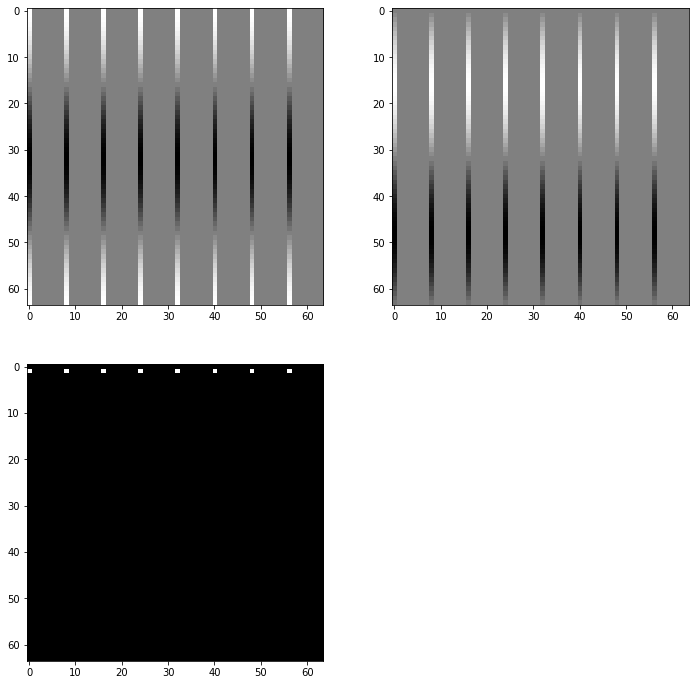

In [61]:
# Playground to get some intuition for 2d fourier transformation
ft = np.zeros((64,64))

# set some random coefficents and see what happens
ft [1, 0:63:8]= 1
#ft[0, 1] = 1

#for t in ft:
#    print(t)
#ft[10, 10] = 1

plt.subplot(221)
plt.imshow(np.real(numpy_ifft2(ft)), cmap='gray')
plt.subplot(222)
plt.imshow(np.imag(numpy_ifft2(ft)), cmap='gray')
plt.subplot(223)
plt.imshow(np.real(ft), cmap='gray')
plt.show()

# Exercise 1 - 2D DFT - 2 Points
Implement the 2D Discrete Fourier Transformation with [Matrix Multiplication](https://en.wikipedia.org/wiki/DFT_matrix). You can use your code from the last assignment to compute the dct matrix.

<function matplotlib.pyplot.show(*args, **kw)>

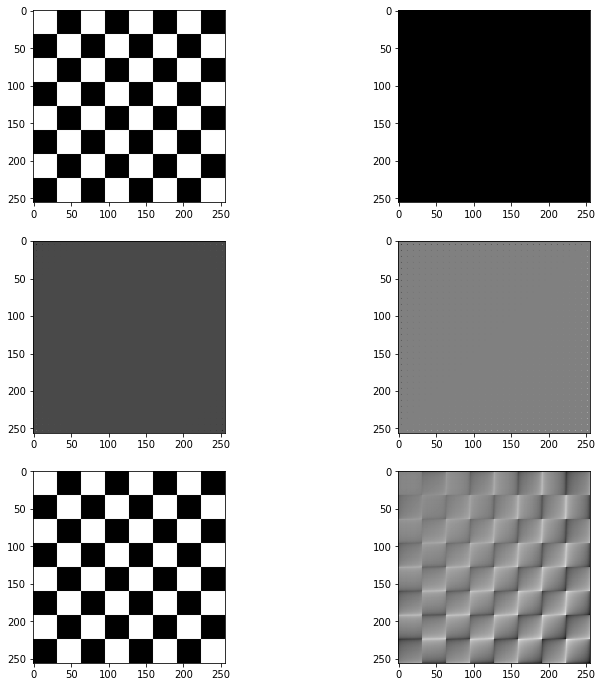

In [74]:
# my DFT Matrix code from assignment 6
def dft_matrix(n):
    omega = np.exp( - 2 * np.pi * 1J / n )
    W = np.ones((n,n), dtype=complex)
    
    for x in range(n):
        for y in range(n):
             # W = (omega**(j*k)) / sqrt(N) where j, k= 0..N-1
            W[x, y] = omega**(x*y)
    return W / np.sqrt(n) 

# new code for inverse DFT Matrix
def dft_inverse(n):
    omega = np.exp(2 * np.pi * 1J / n )
    W = np.ones((n,n), dtype=complex)
    
    for x in range(n):
        for y in range(n):
             # W = (omega**(j*k)) / sqrt(N) where j, k= 0..N-1
            W[x, y] = omega**(x*y)
    return W / n 

def dft2d(img):
    """
    Returns the 2d discrete fourier transformation
    """
    # your code here
    
    size = min(img.shape[0],img.shape[1])
    W = dft_matrix(size)
    
    dft = np.dot(W, img)
    dft2d = np.dot(dft, W)
    return dft2d
    
    # check solution with numpy
    #return numpy_fft2(img)

def inv_dft2d(x):
    """
    Returns the 2d inverse discrete fourier transformation
    """
    # your code here
    size = min(x.shape[0],x.shape[1])
    W_inv = dft_inverse(size)
    
    dft_inv = np.dot(W_inv, x)
    dft2d_inv = np.dot(dft_inv, W_inv)
    return dft2d_inv
    
    # check solution with numpy
    #return numpy_ifft2(x)


def chess_board(n=8, field_size=32):
    board = np.zeros((n*field_size, n*field_size))
    s = field_size
    for i in range(n):
        for j in range(n):
            if (i + j) % 2 == 0:
                board[i*s:(i+1)*s, j*s:(j+1)*s] = 1
    return board

# plot all functions: chess board, dft2d and inverse 
plt.subplot(321)
plt.imshow(np.real(chess_board()), cmap='gray')
plt.subplot(322)
plt.imshow(np.imag(chess_board()), cmap='gray')
plt.subplot(323)
plt.imshow(np.real(dft2d(chess_board())), cmap='gray')
plt.subplot(324)
plt.imshow(np.imag(dft2d(chess_board())), cmap='gray')
plt.subplot(325)
plt.imshow(np.real(inv_dft2d(dft2d(chess_board()))), cmap='gray')
plt.subplot(326)
plt.imshow(np.imag(inv_dft2d(dft2d(chess_board()))), cmap='gray')
plt.show

# Exercise 2 - High and Low Pass filter with the 2D fourier transformation - 3 Points

In [ ]:
def high_pass(img_ft, n):
    """Removes the low frequencies"""
    ft = img_ft.copy()
    ft[:n, :n] = 0
    ft[-n:, :n] = 0
    ft[-n:, -n:] = 0
    ft[:n, -n:] = 0
    return ft

def low_pass(img_ft, n):
    """Removes the high frequencies"""
    # your code here
    return img_ft
    
def band_pass(img_ft, low, high):
    """Only preserve the frequencies between low and high"""
    # your code here
    return img_ft
    
def inv_dft_and_plot(img_ft):
    plt.imshow(np.real(inv_dft2d(img_ft)), cmap='gray')
    plt.show()

In [ ]:
chess_board_ft = dft2d(chess_board())

# display frequency domain of the chess_board
plt.subplot(121)
plt.imshow(np.real(chess_board_ft), cmap='gray')
plt.subplot(122)
plt.imshow(np.imag(chess_board_ft), cmap='gray')
plt.show()

In [ ]:
# remove the low frequencies of the chess board
chess_high_feq = high_pass(chess_board_ft, 12)
inv_dft_and_plot(chess_high_feq)

In [ ]:
# remove the high frequencies of the chess board
chess_low_feq = low_pass(chess_board_ft, 10)
inv_dft_and_plot(chess_low_feq)

In [ ]:
# remove the high frequencies of the chess board
chess_medium_feq = band_pass(chess_board_ft, 5, 15)
inv_dft_and_plot(chess_medium_feq)

In [ ]:
img = rgb2gray(chelsea() / 255)
# filter all frequencies corresponding to the coefficients between 48 and 128.
# your code here

# inv_dft_and_plot()

# Exercise 3 - FFT - 5 Points

Implement the fast fourier transformation. 
Use the [Cooley-Tukey](https://en.wikipedia.org/wiki/Cooley%E2%80%93Tukey_FFT_algorithm) algorithm.

In [ ]:
def fft(x):
    """
    Computes the fast fourier transformation of x.
    """
    return x


In [ ]:
img = rgb2gray(chelsea() / 255)
fft_img = fft(img)

In [ ]:
plt.subplot(121)
plt.imshow(np.real(fft_img))
plt.subplot(122)
plt.imshow(np.imag(fft_img))
plt.show()